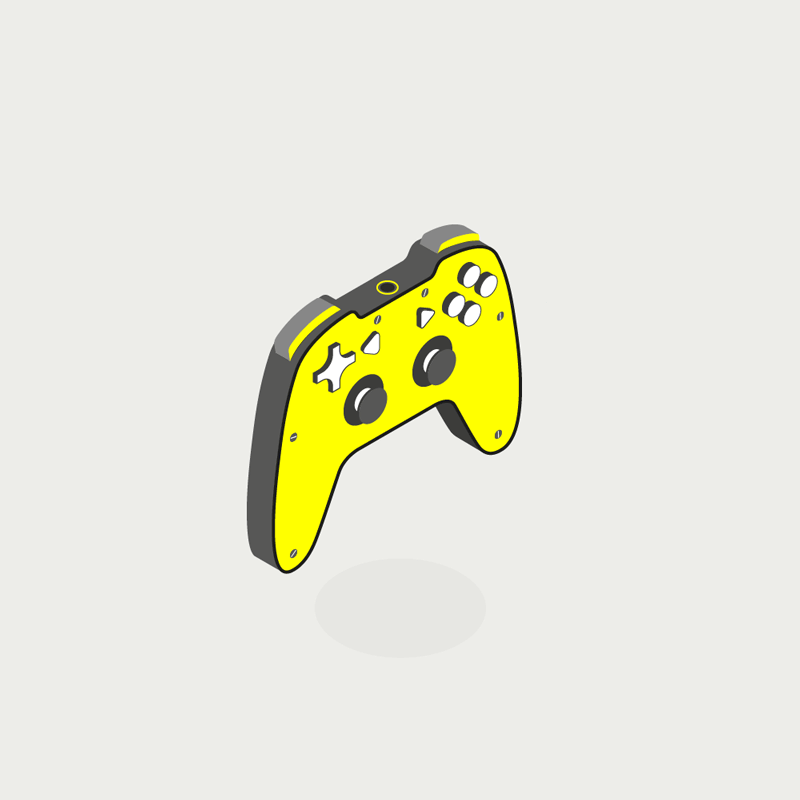

# A game is a structured form of play, usually undertaken for entertainment or fun, and sometimes used as an educational tool. Games are distinct from work, which is usually carried out for remuneration, and from art, which is more often an expression of aesthetic or ideological elements. However, the distinction is not clear-cut, and many games are also considered to be work (such as professional players of spectator sports or games) or art (such as jigsaw puzzles or games involving an artistic layout such as Mahjong, solitaire, or some video games).

# Games are sometimes played purely for enjoyment, sometimes for achievement or reward as well. They can be played alone, in teams, or online; by amateurs or by professionals. The players may have an audience of non-players, such as when people are entertained by watching a chess championship. On the other hand, players in a game may constitute their own audience as they take their turn to play. Often, part of the entertainment for children playing a game is deciding who is part of their audience and who is a player.

# Key components of games are goals, rules, challenge, and interaction. Games generally involve mental or physical stimulation, and often both. Many games help develop practical skills, serve as a form of exercise, or otherwise perform an educational, simulational, or psychological role.

# Attested as early as 2600 BC,games are a universal part of human experience and present in all cultures. The Royal Game of Ur, Senet, and Mancala are some of the oldest known games.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [ ]:
# first 5 rows of dataset
data.head()

In [ ]:
# Shape of dataset
data.shape

In [ ]:
# dataset info
data.info()

# EDA - Exploratory Data Analysis

# Game Genre Counts.

In [ ]:
data["Genre"].value_counts()

In [ ]:
# import visualize package
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=(14, 6))
sns.countplot(x=data["Genre"], palette="Blues_d", data=data)
plt.title("Frequency of Game Genre", fontweight="bold", fontsize=20)

# Action Game Genre => 3316
# Sports Game Genre => 2346

In [ ]:
plt.subplots(figsize=(14, 6))
sns.barplot(x=data["Genre"], y=data["Global_Sales"], data=data)
plt.title("Genre Vs Global Sales", fontweight="bold")

# Top 30 company realease total game count

In [ ]:
pub_game = data["Publisher"].value_counts()[:30]

In [ ]:
pub_game.plot(kind="bar", figsize=(14,6), color="#e35e5e")
plt.title("First 30 company, realse most of the games", fontweight="bold")

# Zone Based Sales

In [ ]:
# Top 30 company Sells
def zone_sells(groupobj):
    sales = data.groupby([groupobj])["Global_Sales", "NA_Sales" ,"EU_Sales" ,"JP_Sales", "Other_Sales"].sum().sort_values("Global_Sales", ascending=False)[:30]
    sales_ = pd.DataFrame(sales)
    sales_.plot(kind="bar", width = 0.9, figsize=(22,7))
    plt.title(f"{groupobj} selling zone", fontweight="bold")

In [ ]:
zone_sells("Publisher")

In [ ]:
zone_sells("Genre")

In [ ]:
zone_sells("Platform")

# Frequency of game release year

In [ ]:
plt.subplots(figsize=(14, 6))
sns.countplot(x=data["Year"], palette="Blues_d", data=data)
plt.title("Frequency of Game Release", fontweight="bold", fontsize=20)
plt.xticks(rotation=90)

In [ ]:
# Most of the game release in 2008 and 2009

# Global sales of games yearly

In [ ]:
year_sale = data.groupby(['Year'])['Global_Sales'].sum()
year_sale = year_sale.reset_index()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

ax1.xaxis.set_tick_params(rotation=90)
ax2.xaxis.set_tick_params(rotation=90)

plt.suptitle('Global Sales Of Games (In Million)', fontweight="bold")
sns.barplot(x=year_sale["Year"], y=year_sale["Global_Sales"], palette="Blues_d", ax=ax1)
ax2.plot(year_sale["Year"], year_sale["Global_Sales"], linewidth=3)

# Gaming Platform Count

In [ ]:
plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x=data["Platform"])

# Most of the Game from Dataset platform is DS
The Nintendo DS or simply DS, is a dual-screen handheld game console developed and released by Nintendo. The device released globally across 2004 and 2005. The DS, an initialism for "Developers' System" or "Dual Screen", introduced distinctive new features to handheld gaming: two LCD screens working in tandem (the bottom one being a touchscreen), a built-in microphone and support for wireless connectivity. Both screens are encompassed within a clamshell design similar to the Game Boy Advance SP. The Nintendo DS also features the ability for multiple DS consoles to directly interact with each other over Wi-Fi within a short range without the need to connect to an existing wireless network. Alternatively, they could interact online using the now-defunct Nintendo Wi-Fi Connection service. Its main competitor was Sony's PlayStation Portable during the seventh generation of video game consoles. 


# PS2
The PlayStation 2 (officially branded as PS2) is a home video game console developed and marketed by Sony Computer Entertainment. It was first released in Japan on March 4, 2000, in North America on October 26, 2000, and in Europe and Australia on November 24, 2000, and is the successor to the original PlayStation, as well as the second installment in the PlayStation console line-up. A sixth-generation console, it competed with Sega's Dreamcast, Nintendo's GameCube, and Microsoft's original Xbox. 


# PS3
The PlayStation 3 (officially abbreviated as PS3) is a home video game console developed by Sony Computer Entertainment. It is the successor to PlayStation 2, and is part of the PlayStation brand of consoles. It was first released on November 11, 2006 in Japan, November 17, 2006 in North America, and March 23, 2007 in Europe and Australia. The PlayStation 3 competed primarily against Microsoft's Xbox 360 and Nintendo's Wii as part of the seventh generation of video game consoles. 

In [ ]:
# From Year1 to Year2 top 30 games and genre count

def game_rank(*years):
    old_games = data[(data["Year"] >= years[0]) & (data["Year"] <= years[1])].sort_values("Year")
    old_games = pd.DataFrame(old_games)
    
    min_rank = old_games["Rank"].min()
    name = old_games[old_games["Rank"]==min_rank][["Name", "Global_Sales"]]
    
    a = name["Name"].values
    sale = name["Global_Sales"].values
    old_30 = data[(data["Year"] >= years[0]) & (data["Year"] <= years[1])].sort_values("Global_Sales", ascending=False)[:30]
    name_sale = old_30.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)
    
    print(f"The Year From {years[0]} to {years[1]} Name of the game is: {a}, It's Rank: {min_rank} And It's Global Sales is {sale} million")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    sns.countplot(x=old_games["Genre"], ax=ax1, palette="Paired")
    ax1.set_title(f"The Year From {years[0]} to {years[1]} Games Genre Count", fontweight="bold")
    
    name_sale.plot(kind="bar", color=["#ff6347"])
    ax1.xaxis.set_tick_params(rotation=90)
    plt.title(f"The Year From {years[0]} to {years[1]} Games Global Sales of 30 games", fontweight="bold")

In [ ]:
game_rank(1980, 1990)

In [ ]:
game_rank(1991, 2000)

In [ ]:
game_rank(2001, 2010)

In [ ]:
game_rank(2011, 2020)

# Some Legendary Old Games
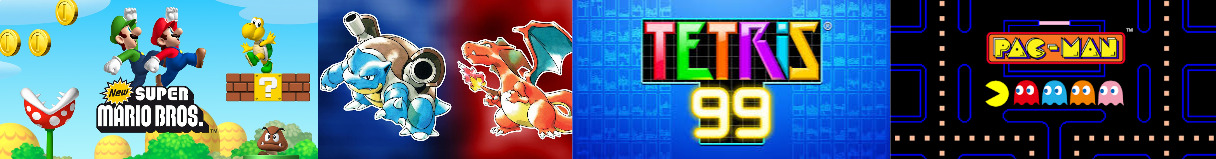

# If you like, please upvote